In [22]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('Agg')
%matplotlib inline 
import random as random
import numpy as np
import csv

x_data=[338.,333.,328.,207.,226.,25.,179.,60.,208.,606.]
y_data=[640.,633.,619.,393.,428.,27.,193.,66.,226.,1591.]


def getGrad(b,w):
    # initial b_grad and w_grad
    b_grad=0.0
    w_grad=0.0
    # 一轮是10笔数据
    for i in range(10):
        b_grad+=(-2.0)*(y_data[i]-(b+w*x_data[i]))
        w_grad+=(-2.0*x_data[i])*(y_data[i]-(b+w*x_data[i]))
    return (b_grad,w_grad)

$$loss\_func = [\hat{y} - (b + w * x)]^2  $$

In [23]:
# 生成一组b和w数据图，方便给gradient descent的过程做标记
x = np.arange(-200, -100, 1) # bias
y = np.arange(-5, 5, 0.1) #weight
Z = np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)

for i in range(len(x)):
    for j in range(len(y)):
        b = x[i]
        w = y[i]

        # Z[j][i] 存储的是loss
        Z[j][i] = 0
        for n in range(len(x_data)):
            # loss func 
            Z[j][i] = Z[j][i] + pow(y_data[n] - (b + w * x_data[n]), 2)
            Z[j][i] = Z[j][i]/len(x_data)



the function will be y_data=-188.43259258228596+2.669453228851236*x_data
error 0 is: 73.84259876943179 
error 1 is: 67.4953326251757 
error 2 is: 68.1480664809194 
error 3 is: 28.855774210080142 
error 4 is: 13.136162861906598 
error 5 is: 148.69626186100504 
error 6 is: 96.39953538208528 
error 7 is: 94.26539885121181 
error 8 is: 140.8136790187711 
error 9 is: 161.7439358984368 
the average error is 89.33967459590238


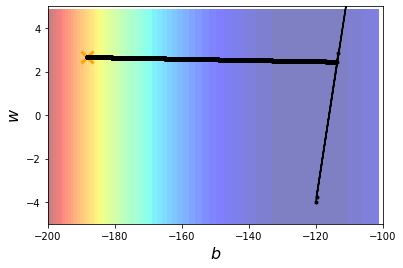

In [33]:
b = -120
w = -4
lr = 100
iteration = 10000
b_history = [b]
w_history = [w]

# 定制化学习率
lr_b = 0
lr_w = 0


# 梯度下降 
for i in range(iteration):
    b_grad, w_grad = getGrad(b, w)

    # 不同的学习率
    lr_b = lr_b + b_grad ** 2
    lr_w = lr_w + w_grad ** 2

    # b -= lr * b_grad
    # w -= lr * w_grad

    # Adagrad
    b -= lr / np.sqrt(lr_b) * b_grad
    w -= lr / np.sqrt(lr_w) * w_grad

    b_history.append(b)
    w_history.append(w)


print("the function will be y_data="+str(b)+"+"+str(w)+"*x_data")
error=0.0
for i in range(10):
    print("error "+str(i)+" is: "+str(np.abs(y_data[i]-(b+w*x_data[i])))+" ")
    error+=np.abs(y_data[i]-(b+w*x_data[i]))
average_error=error/10
print("the average error is "+str(average_error))


# 图形化 
plt.contourf(x,y,Z,50,alpha=0.5,cmap=plt.get_cmap('jet'))
plt.plot([-188.4],[2.67],'x',ms=12,markeredgewidth=3,color='orange')
plt.plot(b_history,w_history,'o-',ms=3,lw=1.5,color='black')
plt.xlim(-200,-100)
plt.ylim(-5,5)
plt.xlabel(r'$b$',fontsize=16)
plt.ylabel(r'$w$',fontsize=16)
plt.show()


